In [12]:
# Read from an image, detect edges, and save the result

# Open image
import cv2
from IPython.display import display

image = "../input/homer.jpg"

img = cv2.imread(image)
if img is None:
    print("Error: Could not read image.")
    exit(1)
    
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

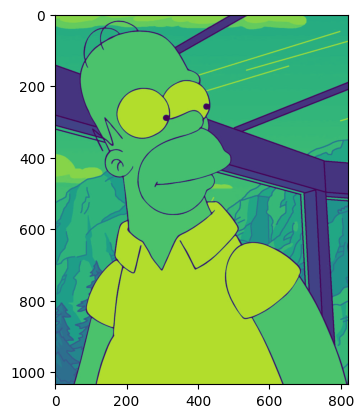

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plt.imshow(gray)
plt.show()

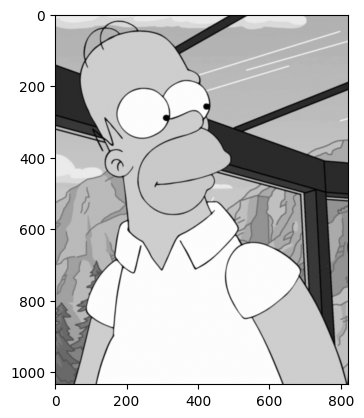

In [14]:
# Apply gaussian filter
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')

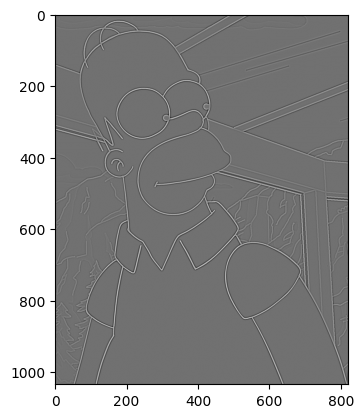

In [15]:
# Apply highpass filter onto blurred image using laplacian
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')

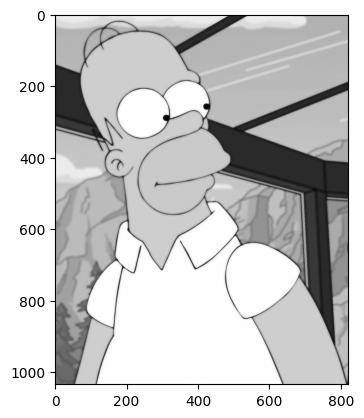

In [16]:
# Apply bilateral filter
bilateral = cv2.bilateralFilter(gray, 10, 100, 100)
plt.imshow(bilateral, cmap='gray')

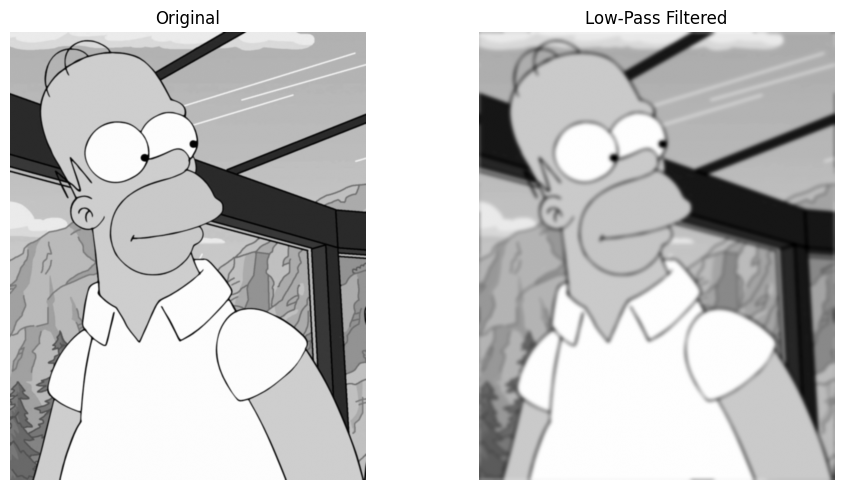

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def low_pass_filter_fft_gaussian(img, cutoff_ratio=0.05):
    # Convert to grayscale if needed
    if len(img.shape) == 3 and img.shape[2] == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    rows, cols = gray.shape
    crow, ccol = rows // 2 , cols // 2

    # FFT and shift
    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)

    # Create a Gaussian low-pass filter mask
    X, Y = np.meshgrid(np.linspace(-1,1,cols), np.linspace(-1,1,rows))
    D = np.sqrt(X**2 + Y**2)
    sigma = cutoff_ratio
    gaussian_mask = np.exp(- (D**2) / (2 * sigma**2))

    # Apply filter and inverse FFT
    filtered_shift = dft_shift * gaussian_mask
    f_ishift = np.fft.ifftshift(filtered_shift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

# Load image
filtered_img = low_pass_filter_fft_gaussian(blurred, cutoff_ratio=0.1)  # Smaller = smoother

# Resmooth filtered_img with bilateral filter and gaussian
filtered_img = cv2.bilateralFilter(filtered_img.astype(np.uint8), 10, 100, 100)
filtered_img = cv2.GaussianBlur(filtered_img, (5, 5), 0)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Low-Pass Filtered")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

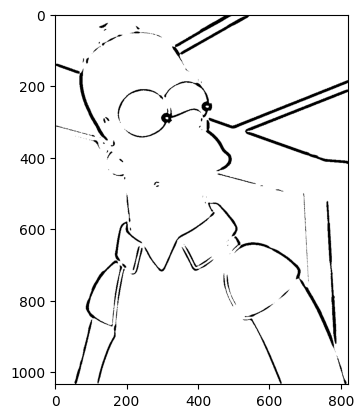

In [ ]:
# Detect edges with Sobel operator
target = bilateral

sobel_x = cv2.Sobel(target, cv2.CV_64F, 1, 0, ksize=1)
sobel_y = cv2.Sobel(target, cv2.CV_64F, 0, 1, ksize=1)
sobel = cv2.magnitude(sobel_x, sobel_y)

# Thresh
sobel_thresh = cv2.inRange(sobel, 0000, 20)

plt.imshow(sobel_thresh, cmap='gray')

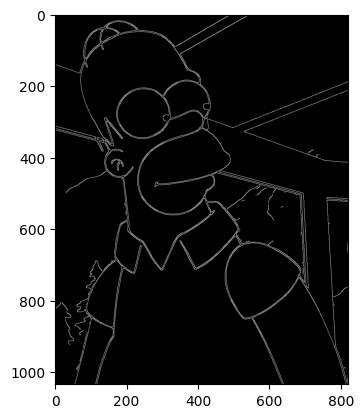

In [19]:
canny = cv2.Canny(bilateral, threshold1=100, threshold2=70)
plt.imshow(canny, cmap='gray')